## Import Libraries and Initial Setup
- Imported required libraries including pandas, numpy, scikit-learn, etc.
- Set random seed for reproducibility (SEED = 42)

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import random
import seaborn as sns
import warnings

In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Data Loading and Preprocessing
- Loaded dataset from 'data/dataset.csv'
- Replaced underscores with spaces in all columns
- Checked for null values
- Cleaned and preprocessed the data:
    - Stripped whitespace
    - Filled missing values with 0

In [3]:
df=pd.read_csv('data/dataset.csv')
df.head(5)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in df.columns:
    
    df[col] = df[col].str.replace('_',' ')
print(df.shape)
df.describe()

(4920, 18)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


## Feature Engineering
- Extracted symptoms data from columns 1-17
- Encoded disease labels using LabelEncoder
- Created binary features for each unique symptom
- Added small random noise (5%) to simulate diagnostic uncertainty

In [6]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df = df.fillna(0)
df.head(20)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# . Extract symptoms data and define features
# Define symptom columns
data_symptoms = df.iloc[:, 1:18]  # All symptom columns (excluding Disease)

# . Encode the disease labels
le = LabelEncoder()
df['Disease_encoded'] = le.fit_transform(df['Disease'])

# 5. Extract all unique symptoms
all_symptoms = set()
for col in data_symptoms.columns:
    unique_symptoms = set(data_symptoms[col].dropna().unique())
    if '0' in unique_symptoms:
        unique_symptoms.remove('0')
    if 0 in unique_symptoms:
        unique_symptoms.remove(0)
    all_symptoms.update(unique_symptoms)

print(f"Total unique symptoms found: {len(all_symptoms)}")

Total unique symptoms found: 131


In [8]:
X = pd.DataFrame(index=df.index)
for symptom in all_symptoms:
    # Create feature for this symptom
    has_symptom = (data_symptoms == symptom).any(axis=1).astype(int)
    
    # Add small random noise to 5% of the entries to simulate diagnostic uncertainty
    mask = np.random.choice([True, False], size=len(has_symptom), p=[0.05, 0.95])
    has_symptom_with_noise = has_symptom.copy()
    has_symptom_with_noise[mask] = 1 - has_symptom_with_noise[mask]  # Flip 0->1, 1->0
    
    X[f"has_{symptom}"] = has_symptom_with_noise

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10824\2778655323.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"has_{symptom}"] = has_symptom_with_noise
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10824\2778655323.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"has_{symptom}"] = has_symptom_with_noise
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10824\2778655323.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

## Model Training and Evaluation
- Split data into training (80%) and test (20%) sets
- Trained multiple models:
    - Logistic Regression
    - Random Forest
    - Gradient Boosting
    - K-Nearest Neighbors
    - Bernoulli Naive Bayes
    - Support Vector Machine

In [9]:
# Target variable
y = df['Disease_encoded']

# . Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3936, 131)
X_test shape: (984, 131)
y_train shape: (3936,)
y_test shape: (984,)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=SEED),
}
# . Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")

Training Logistic Regression...
Logistic Regression - Test Accuracy: 0.9898
Training Random Forest...
Random Forest - Test Accuracy: 0.9888
Training Gradient Boosting...
Gradient Boosting - Test Accuracy: 0.9837


In [22]:
print("\n--- Model Comparison ---")
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for model_name, accuracy in sorted_results:
    print(f"{model_name}: {accuracy:.4f}")

#. Select the best model
best_model_name = sorted_results[0][0]
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {sorted_results[0][1]:.4f}")

# . Calculate detailed metrics for the best model
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


--- Model Comparison ---
Logistic Regression: 0.9898
Random Forest: 0.9888
Gradient Boosting: 0.9837

Best model: Logistic Regression with accuracy 0.9898


In [23]:
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy:.2%})")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy:.2%})")
# 13. Print classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))


Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.9898 (98.98%)

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      1.00      1.00        96
          13       1.00      1.00      1.00        96
          14       1.00      1.00      1.00        96
          15       1.00      1.00 

Test Confusion Matrix:
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]


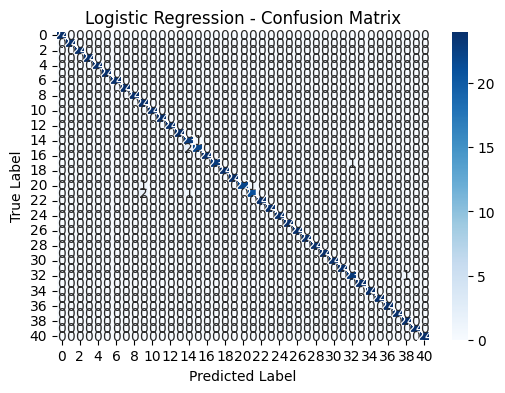


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       0.89      1.00      0.94        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       0.88      0.96      0.92        24
          15       0.96      0.92      0.94        24
          16       1.00      1.00      1.00        2

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
# Compute confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)

print("Test Confusion Matrix:\n", cm_test)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title(f'{best_model_name} - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

## Model Performance Analysis
- Generated learning curves to analyze model behavior
- Plotted training vs test accuracy comparison
- Detailed classification reports for both training and test sets

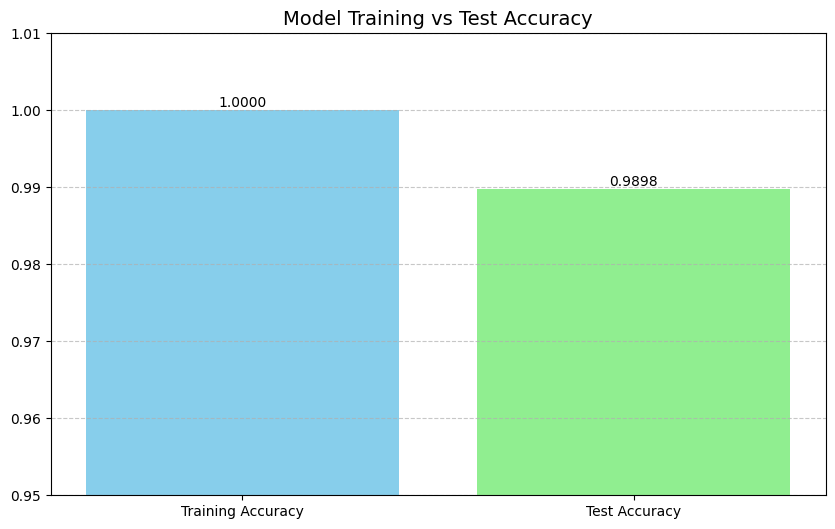

In [25]:
plt.figure(figsize=(10, 6))
bars = plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], 
               color=['skyblue', 'lightgreen'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.title('Model Training vs Test Accuracy', fontsize=14)
plt.ylim(0.95, 1.01)  # Set y-axis limits to better show the small differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


--- Learning Curve Analysis for Logistic Regression ---


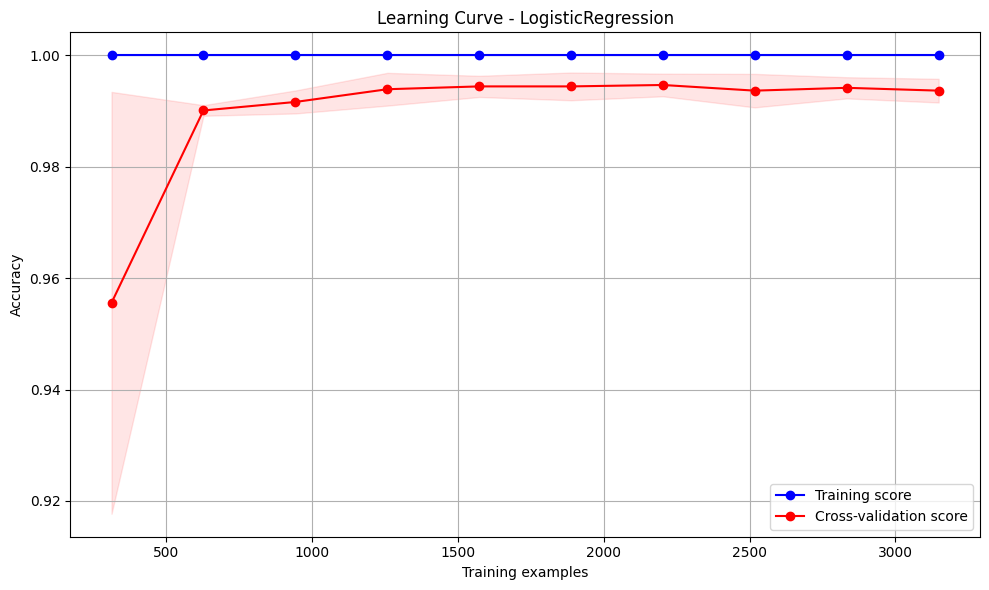

In [26]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1
    )
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color="blue")
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, 
                     alpha=0.1, color="red")
    
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, validation_mean, 'o-', color="red", label="Cross-validation score")
    
    plt.title(f"Learning Curve - {model.__class__.__name__}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Generate learning curve for the best model
print(f"\n--- Learning Curve Analysis for {best_model_name} ---")
plot_learning_curve(best_model, X_train, y_train)

## Model Persistence
- Saved trained model, encoder and symptoms list for future use:
    - disease_prediction_model.pkl
    - disease_encoder.pkl
    - all_symptoms.pkl

In [15]:
joblib.dump(best_model, 'TrainedModel/disease_prediction_model.pkl')
joblib.dump(le, 'TrainedModel/disease_encoder.pkl')
joblib.dump(list(all_symptoms), 'TrainedModel/all_symptoms.pkl')
print("Model and encoder saved successfully!")

Model and encoder saved successfully!


In [27]:
import joblib
import pandas as pd
import numpy as np
import sys

def load_model_components():
    """Load the saved model and required data files"""
    try:
        model = joblib.load('TrainedModel/disease_prediction_model.pkl')
        encoder = joblib.load('TrainedModel/disease_encoder.pkl')
        all_symptoms = joblib.load('TrainedModel/all_symptoms.pkl')
        disease_descriptions = pd.read_csv('data/symptom_Description.csv')
        disease_precautions = pd.read_csv('data/symptom_precaution.csv')
        print("Model components loaded successfully.")
        return model, encoder, all_symptoms, disease_descriptions, disease_precautions
    except Exception as e:
        print(f"Error loading model components: {str(e)}")
        sys.exit(1)

def predict_disease(symptoms, top_n=3):
    """
    Predict diseases based on provided symptoms.
    
    Args:
        symptoms (list): List of symptoms as strings.
        top_n (int): Number of top predictions to return (default 3).
    
    Returns:
        list: List of dictionaries with disease predictions.
    """
    # Load model components
    model, encoder, all_symptoms, descriptions, precautions = load_model_components()
    
    # Create feature vector
    input_features = pd.DataFrame(0, index=[0], columns=[f"has_{symptom}" for symptom in all_symptoms])
    for symptom in symptoms:
        symptom_col = f"has_{symptom.lower()}"
        if symptom_col in input_features.columns:
            input_features[symptom_col] = 1
    
    # Predict probabilities and get top N results
    probabilities = model.predict_proba(input_features)[0]
    top_indices = probabilities.argsort()[-top_n:][::-1]
    
    results = []
    for idx in top_indices:
        disease = encoder.inverse_transform([idx])[0]
        description = descriptions.loc[descriptions['Disease'] == disease, 'Description'].squeeze()
        precautions_list = precautions.loc[precautions['Disease'] == disease].iloc[:, 1:].dropna().values.flatten().tolist()
        
        results.append({
            "disease": disease,
            "confidence": probabilities[idx],
            "description": description if pd.notna(description) else "No description available.",
            "precautions": precautions_list if precautions_list else ["No precautions available."]
        })
    
    return results

def run_test_cases():
    """Run test cases with various symptom combinations"""
    test_cases = [
        ["itching", "skin rash", "nodal skin eruptions"],
        ["continuous sneezing", "shivering", "chills"],
        ["joint pain", "stomach pain", "vomiting"],
        ["high fever", "headache", "fatigue"],
        ["cough", "breathlessness", "sweating"],
        ["chest pain", "fast heart rate", "dizziness"],
        ["stiff neck", "confusion", "sensitivity to light"],
        ["muscle wasting", "patches in throat", "high fever"],
        ["vomiting", "sunken eyes", "dehydration"],
        ["indigestion", "abdominal pain", "yellowish skin"]
    ]
    
    print("=== DISEASE PREDICTION TEST CASES ===\n")
    
    for i, symptoms in enumerate(test_cases, 1):
        print(f"Test Case #{i}: Symptoms = {', '.join(symptoms)}")
        
        # Get top 3 predictions
        predictions = predict_disease(symptoms, top_n=3)
        
        print("Top 3 Potential Diagnoses:")
        for j, pred in enumerate(predictions, 1):
            print(f"  {j}. {pred['disease']} (Confidence: {pred['confidence']:.2%})")
        
        # Show details for top prediction only
        top_pred = predictions[0]
        print(f"\nMost Likely Diagnosis: {top_pred['disease']}")
        desc_preview = top_pred['description'][:150] + "..." if len(top_pred['description']) > 150 else top_pred['description']
        print(f"Description: {desc_preview}")
        
        print("Recommended Precautions:")
        for k, precaution in enumerate(top_pred['precautions'][:3], 1):
            print(f"  {k}. {precaution}")
            
        print("\n" + "-"*50 + "\n")

if __name__ == "__main__":
    run_test_cases()

=== DISEASE PREDICTION TEST CASES ===

Test Case #1: Symptoms = itching, skin rash, nodal skin eruptions
Model components loaded successfully.
Top 3 Potential Diagnoses:
  1. Fungal infection (Confidence: 99.00%)
  2. Drug Reaction (Confidence: 0.34%)
  3. Acne (Confidence: 0.14%)

Most Likely Diagnosis: Fungal infection
Description: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can l...
Recommended Precautions:
  1. bath twice
  2. use detol or neem in bathing water
  3. keep infected area dry

--------------------------------------------------

Test Case #2: Symptoms = continuous sneezing, shivering, chills
Model components loaded successfully.
Top 3 Potential Diagnoses:
  1. Allergy (Confidence: 99.30%)
  2. Heart attack (Confidence: 0.10%)
  3. Urinary tract infection (Confidence: 0.05%)

Most Likely Diagnosis: Allergy
Description: An allergy is an immune system response to a foreign 